In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from tqdm import tqdm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Pair Programming Decision Tree

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. Los objetivos de este pair programming :
- Ajustad un modelo de Decision Tree a nuestros datos.
- Calculad las métricas a nuestro nuevo modelo.
- Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [2]:
df = pd.read_pickle('datos/Invistico_Airline_v4_enco.pkl')

In [3]:
df.head(2)

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Online boarding,Age,Flight Distance,Departure Delay in Minutes,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5
0,0,1.000,1.0,1.282,2.085,0.006,1.004,1.219,1.505,1.000,...,2.68,1.691351,-1.671103,-0.386481,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1.606,1.0,1.282,1.000,0.006,1.004,1.559,1.672,2.961,...,2.68,0.500820,0.469852,7.756204,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# separamos los datos en X e y

X = df.drop("satisfaction", axis = 1)
y = df["satisfaction"]

In [5]:
# dividimos nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)

In [7]:
# creamos el objeto del modelo
arbol = DecisionTreeClassifier(random_state =37)

# ajustamos el modelo
arbol.fit(x_train, y_train)

DecisionTreeClassifier(random_state=37)

In [8]:
# sacamos la raiz cuadrada de las variables predictoras que nos indica el valor para el max_features

max_features = np.sqrt(len(x_train.columns))
max_features

5.0990195135927845

In [9]:
# imprimimos la máxima profundidad del arbol; podemos probar una profundidad de hasta la mitad de este valor en los hiperparametros 

print(arbol.tree_.max_depth)

37


In [10]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test = arbol.predict(x_test)
y_pred_train = arbol.predict(x_train)

In [11]:
# volvemos a usar esta funcion para crear un dataframe de las metricas del modelo

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    
    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [12]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test, y_pred_test, y_train, y_pred_train, "Decision Tree I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.936749,0.934697,0.925935,0.930296,0.872407,test,Decision Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I


In [28]:
# creamos un diccionario de los parametros que queremos pasar al GridSearch

param = {"max_depth": [6, 8, 12, 16, 18],
        "max_features": [3,4,5],
        "min_samples_split": [5,10,20,30,50],
        "min_samples_leaf": [5,10,20,30,50]} 

In [29]:
gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 37), 
            param_grid= param, 
            cv=10,  
            verbose=-1) 

In [30]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=37),
             param_grid={'max_depth': [6, 8, 12, 16, 18],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 30, 50],
                         'min_samples_split': [5, 10, 20, 30, 50]},
             verbose=-1)

In [31]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=16, max_features=5, min_samples_leaf=5,
                       min_samples_split=20, random_state=37)

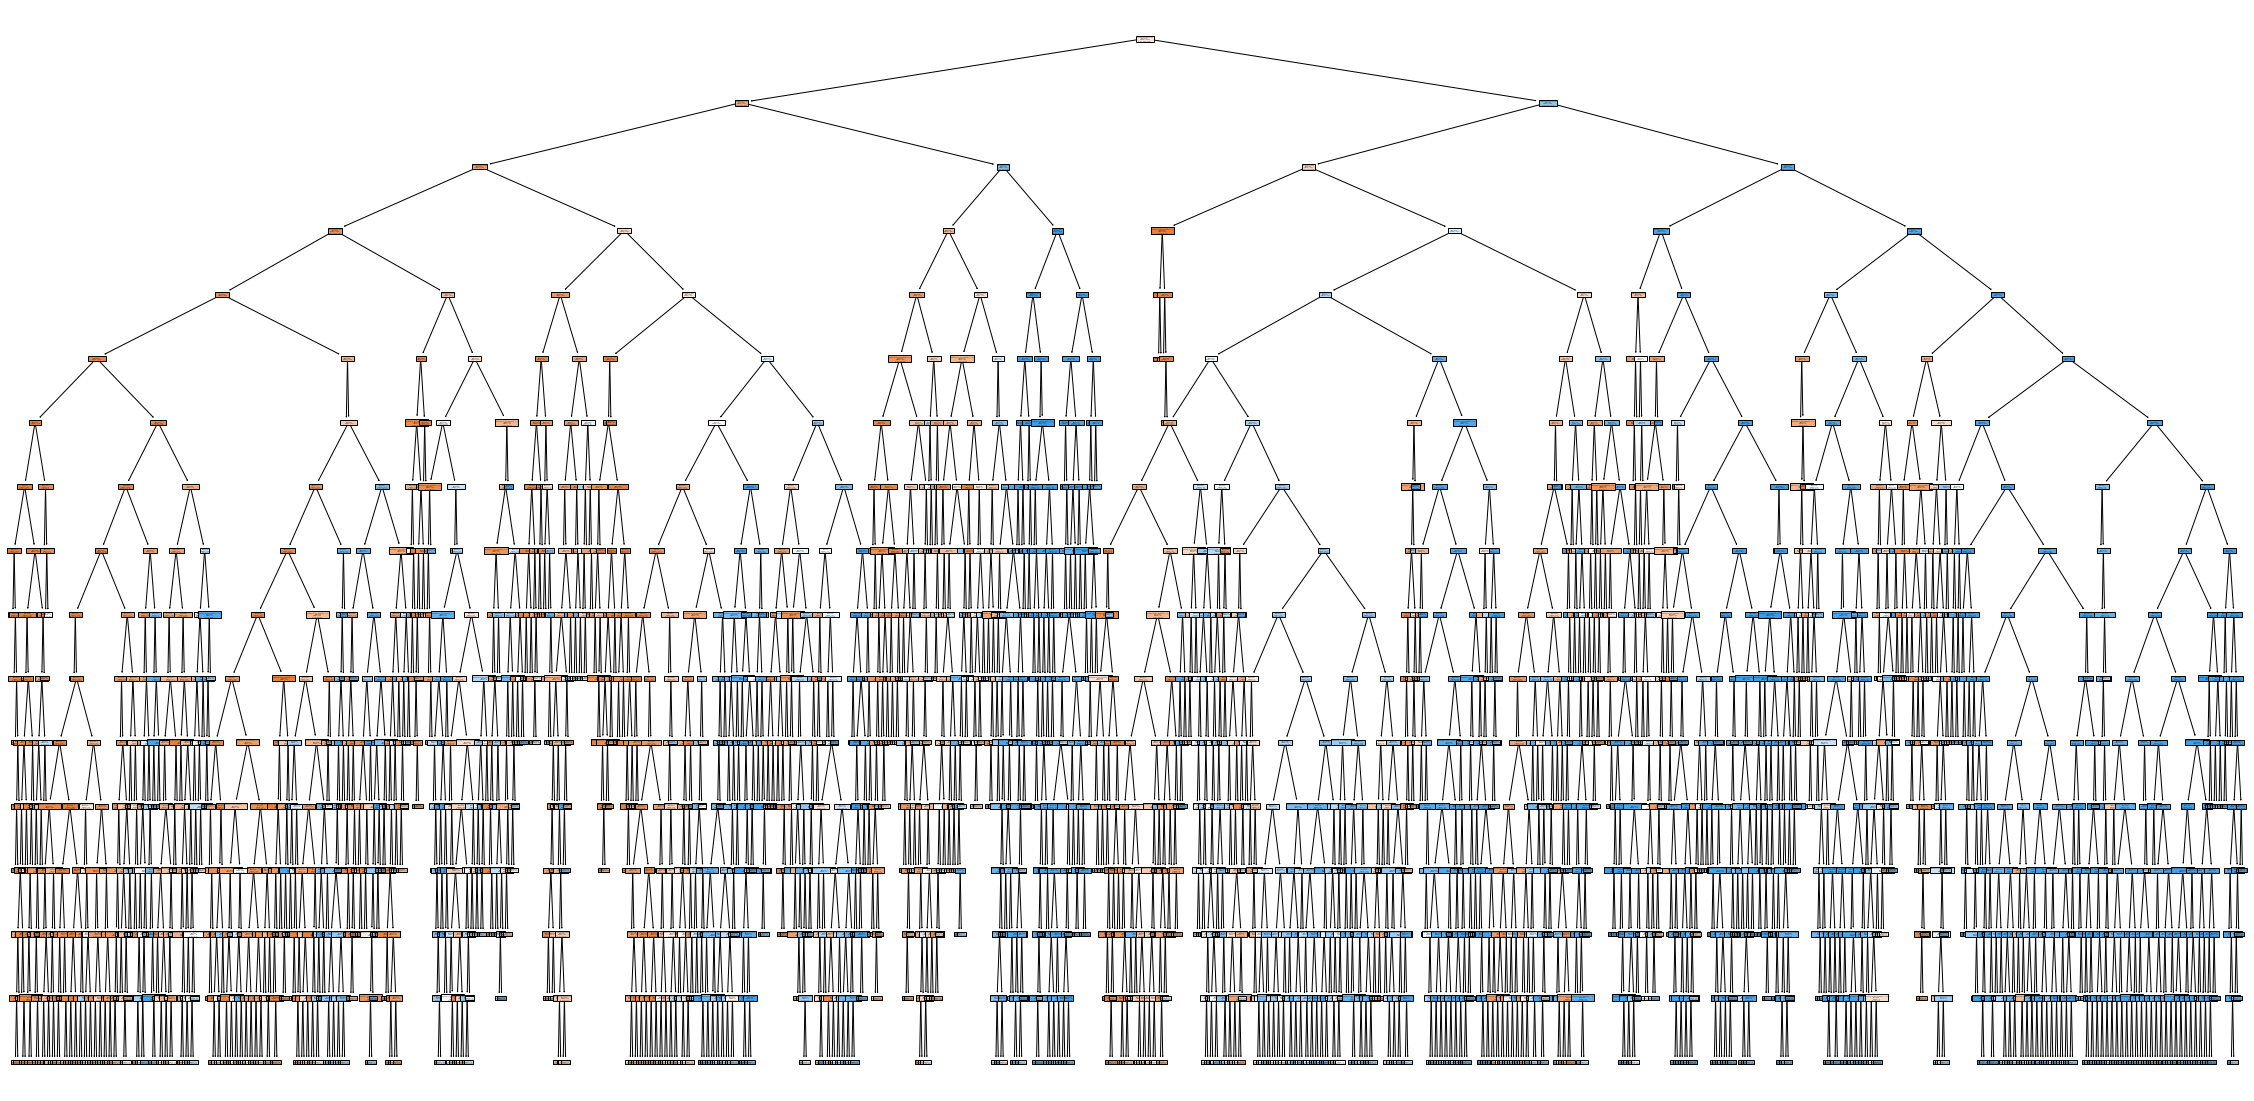

In [32]:
# veamos ahora que pinta tiene nuestro árbol

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [33]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [34]:
dt_results2 = metricas(y_test, y_pred_test_dt2, y_train,  y_pred_train_dt2, "Decision tree II")
dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.931206,0.917872,0.932523,0.925139,0.861509,test,Decision tree II
1,0.945363,0.933862,0.946094,0.939938,0.889831,train,Decision tree II


In [35]:
resultados_r_log = pd.read_pickle('datos/Invistico_Airline_r_log.pkl')
resultados_r_log

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.895480,0.894178,0.874166,0.884059,0.788934,test,Regresión logistica
1,0.897059,0.892347,0.878131,0.885182,0.791902,train,Regresión logistica


In [36]:
models_results = pd.concat([resultados_r_log, dt_results1, dt_results2], axis = 0).reset_index(drop=True)
models_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.895480,0.894178,0.874166,0.884059,0.788934,test,Regresión logistica
1,0.897059,0.892347,0.878131,0.885182,0.791902,train,Regresión logistica
2,0.936749,0.934697,0.925935,0.930296,0.872407,test,Decision Tree I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I
4,0.931206,0.917872,0.932523,0.925139,0.861509,test,Decision tree II
5,0.945363,0.933862,0.946094,0.939938,0.889831,train,Decision tree II


In [37]:
# vamos a crearnos un dataframe 
importancia_predictores_dt = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores_dt.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo Decision Tree")
print("-------------------------------------------")
importancia_predictores_dt


Importancia de los predictores en el modelo Decision Tree
-------------------------------------------


,predictor,importancia
10,Ease of Online booking,0.236545
8,Inflight entertainment,0.198721
4,Seat comfort,0.167926
1,Customer Type,0.107514
2,Type of Travel,0.038253
11,On-board service,0.036341
0,Gender,0.031642
9,Online support,0.021477
16,Online boarding,0.021235
3,Class,0.020986


In [39]:
departure = importancia_predictores_dt.loc[[25,24,20,23,21,22]]
departure

,predictor,importancia
25,Departure/Arrival time convenient_5,0.008035
24,Departure/Arrival time convenient_4,0.003783
20,Departure/Arrival time convenient_0,0.001973
23,Departure/Arrival time convenient_3,0.001475
21,Departure/Arrival time convenient_1,0.001179
22,Departure/Arrival time convenient_2,0.000869


In [41]:
importancia_predictores_dt.drop(departure.index, inplace = True)
importancia_predictores_dt

,predictor,importancia
10,Ease of Online booking,0.236545
8,Inflight entertainment,0.198721
4,Seat comfort,0.167926
1,Customer Type,0.107514
2,Type of Travel,0.038253
11,On-board service,0.036341
0,Gender,0.031642
9,Online support,0.021477
16,Online boarding,0.021235
3,Class,0.020986


In [42]:
importancia_predictores_dt.loc[20] =  ["Departure/Arrival time convenient", departure["importancia"].sum()]

In [43]:
importancia_predictores_dt.sort_values(by = "importancia", ascending = False, inplace = True)
importancia_predictores_dt

,predictor,importancia
10,Ease of Online booking,0.236545
8,Inflight entertainment,0.198721
4,Seat comfort,0.167926
1,Customer Type,0.107514
2,Type of Travel,0.038253
11,On-board service,0.036341
0,Gender,0.031642
9,Online support,0.021477
16,Online boarding,0.021235
3,Class,0.020986


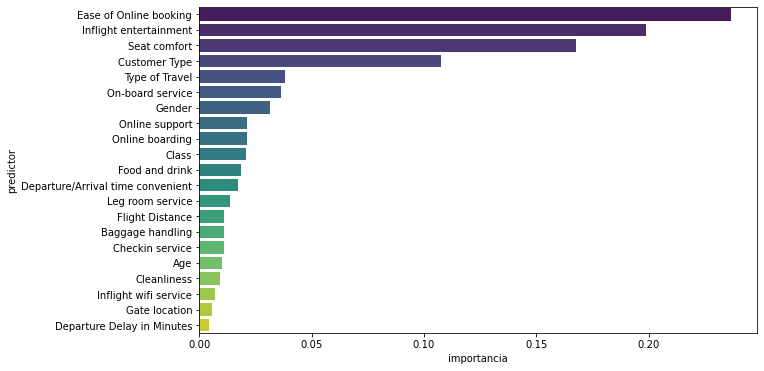

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_dt, palette="viridis");
plt.show()

# Pair Programming Random Forest

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Random Forest en este tipo de problemas. Los objetivos de este pair programming :
- Ajustad un modelo de Random Forest a nuestros datos.
- Calculad las métricas a nuestro nuevo modelo.
- Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [46]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=37), 
            param_grid= param, 
            cv=10, 
            verbose=-1) 

In [47]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=37),
             param_grid={'max_depth': [6, 8, 12, 16, 18],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 30, 50],
                         'min_samples_split': [5, 10, 20, 30, 50]},
             verbose=-1)

In [48]:
bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=18, max_features=5, min_samples_leaf=5,
                       min_samples_split=5, random_state=37)

In [ ]:
# for arbol in tqdm(bosque.estimators_):
#     fig = plt.figure(figsize=(20, 10))
#     tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
#     plt.show()

In [49]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [50]:
dt_results_rf = metricas(y_test, y_pred_test_rf,y_train, y_pred_train_rf, "Random Forest")
dt_results_rf

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.951417,0.945132,0.948484,0.946805,0.902098,test,Random Forest
1,0.970319,0.961846,0.972909,0.967346,0.940143,train,Random Forest


In [51]:
models_results_rf = pd.concat([dt_results_rf, models_results], axis = 0).reset_index(drop=True)
models_results_rf

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.951417,0.945132,0.948484,0.946805,0.902098,test,Random Forest
1,0.970319,0.961846,0.972909,0.967346,0.940143,train,Random Forest
2,0.895480,0.894178,0.874166,0.884059,0.788934,test,Regresión logistica
3,0.897059,0.892347,0.878131,0.885182,0.791902,train,Regresión logistica
4,0.936749,0.934697,0.925935,0.930296,0.872407,test,Decision Tree I
5,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I
6,0.931206,0.917872,0.932523,0.925139,0.861509,test,Decision tree II
7,0.945363,0.933862,0.946094,0.939938,0.889831,train,Decision tree II


Tras comparar nuestros modelos, creemos que Random Forest es el modelo que mejor predice nuestros datos. En nuestra opinión no hay overfitting y el valor kappa superior a 0.9 nos indica que el modelo tiene un gran valor predictivo y dichas predicciones no se deben al azar, sino a que toma en cuenta las características correctas. 

El segundo modelo de Decision Tree mejora al primero en cuanto al overfitting, aunque sus métricas no alcanzan los valores de Random Forest. 

Tanto los modelos de Decision Tree como de Random Forest mejoran al modelo de regresión logística en todas sus métricas.

In [53]:
importancia_predictores_rf = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores_rf.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo Random Forest")
print("-------------------------------------------")
importancia_predictores_rf

Importancia de los predictores en el modelo Random Forest
-------------------------------------------


,predictor,importancia
8,Inflight entertainment,0.217892
4,Seat comfort,0.155594
10,Ease of Online booking,0.081261
9,Online support,0.069591
1,Customer Type,0.053478
11,On-board service,0.048627
3,Class,0.040512
12,Leg room service,0.037177
16,Online boarding,0.036287
5,Food and drink,0.035674


In [54]:
departure_rf = importancia_predictores_rf.loc[[25,24,20,23,21,22]]
departure_rf

,predictor,importancia
25,Departure/Arrival time convenient_5,0.010336
24,Departure/Arrival time convenient_4,0.007043
20,Departure/Arrival time convenient_0,0.002541
23,Departure/Arrival time convenient_3,0.002363
21,Departure/Arrival time convenient_1,0.002051
22,Departure/Arrival time convenient_2,0.002070


In [55]:
importancia_predictores_rf.drop(departure_rf.index, inplace = True)
importancia_predictores_rf

,predictor,importancia
8,Inflight entertainment,0.217892
4,Seat comfort,0.155594
10,Ease of Online booking,0.081261
9,Online support,0.069591
1,Customer Type,0.053478
11,On-board service,0.048627
3,Class,0.040512
12,Leg room service,0.037177
16,Online boarding,0.036287
5,Food and drink,0.035674


In [56]:
importancia_predictores_rf.loc[20] =  ["Departure/Arrival time convenient", departure_rf["importancia"].sum()]

In [57]:
importancia_predictores_rf.sort_values(by = "importancia", ascending = False, inplace = True)
importancia_predictores_rf

,predictor,importancia
8,Inflight entertainment,0.217892
4,Seat comfort,0.155594
10,Ease of Online booking,0.081261
9,Online support,0.069591
1,Customer Type,0.053478
11,On-board service,0.048627
3,Class,0.040512
12,Leg room service,0.037177
16,Online boarding,0.036287
5,Food and drink,0.035674


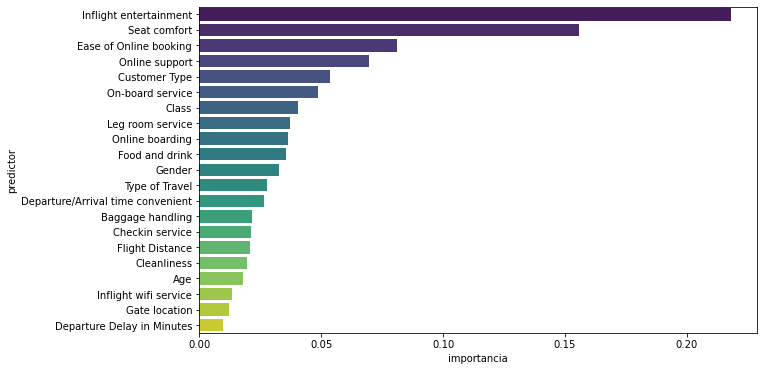

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_rf, palette="viridis");
plt.show()

In [59]:
models_results_rf.to_pickle('datos/Invistico_Airline_RF.pkl')

Al estudiar la importancia de las variables en el modelo Random Forest encontramos que las que tienen mayor importancia a la hora de predecir si un cliente va a estar insatisfecho son Inflight entertainment y Seat comfort. Nos sorprende que la variable Ease of Online booking, que era la más importante en el modelo de Decision Tree, se ve relegada a la tercera posición en importancia y con mucha diferencia respecto a las dos primeras. 